# Product Prediction

To create a product prediction model using the Apriori algorithm, you will focus on market basket analysis .The Apriori algorithm is commonly used to identify association rules in transactional data, which can help determine which products are frequently purchased together.

## Import Libraries
Start by importing the necessary libraries

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

## Load  Dataset


In [2]:
# Load the dataset
df = pd.read_csv('..\\data\\retail_sales_dataset.csv')

# Display the first few rows of the dataset
print(df.head())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


## Data Preprocessing
Create Transaction Data
To use the Apriori algorithm, you need to convert your data into a format suitable for analysis. This typically involves creating a one-hot encoded DataFrame where each row represents a transaction and each column represents a product.
Group by Transaction ID: Aggregate the data to create a list of products for each transaction.
One-Hot Encoding: Convert these lists into a one-hot encoded DataFrame.

In [3]:
# Group by Transaction ID and aggregate Product Category
basket = (df.groupby(['Transaction ID', 'Product Category'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Transaction ID'))

# Convert quantities to 1s and 0s (1 if purchased, 0 if not)
basket = basket.map(lambda x: 1 if x > 0 else 0)

print(basket.head())

Product Category  Beauty  Clothing  Electronics
Transaction ID                                 
1                      1         0            0
2                      0         1            0
3                      0         0            1
4                      0         1            0
5                      1         0            0


## Apply the Apriori Algorithm
Use the Apriori algorithm to find frequent itemsets in the transaction data.

In [4]:
# Apply Apriori algorithm with a minimum support threshold (e.g., 0.01)
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Display frequent itemsets
print(frequent_itemsets)

   support       itemsets
0    0.307       (Beauty)
1    0.351     (Clothing)
2    0.342  (Electronics)


c:\Users\User\.conda\envs\mba\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


# Generate Association Rules
Now that you have frequent itemsets, generate association rules from these itemsets.


In [5]:
# Generate association rules with a minimum confidence threshold (e.g., 0.5)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display the generated rules
print(rules)

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


## Analyze Results
Interpret Association Rules
The resulting rules will contain metrics such as support, confidence, and lift:
Support: The proportion of transactions that contain the itemset.
Confidence: The likelihood that if one item is bought, another item will also be bought.
Lift: The ratio of observed support to that expected if the two items were independent.
You can filter or sort these rules based on metrics of interest:

In [6]:
# Sort rules by lift
rules = rules.sort_values(by='lift', ascending=False)

# Display top rules
print(rules.head())

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


## Visualization

 Visualize Support vs. Confidence
A scatter plot can help visualize the relationship between support and confidence for each rule.
python

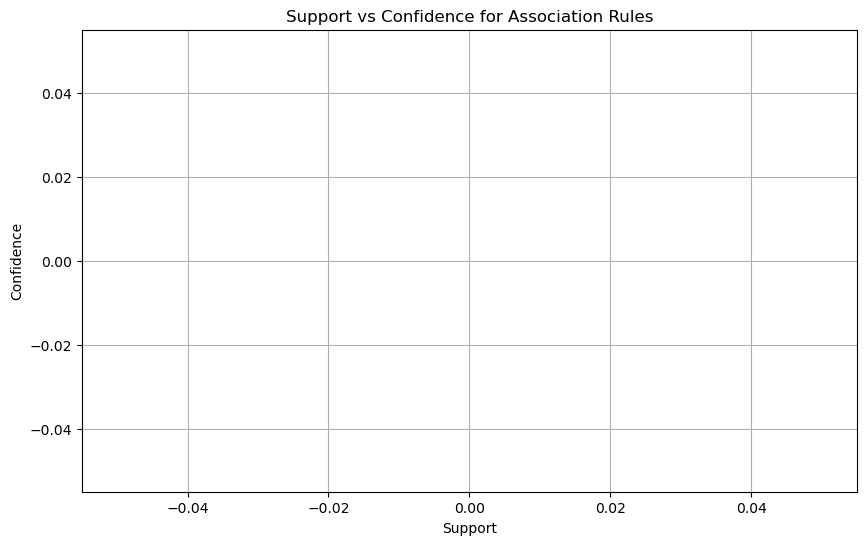

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules, x='support', y='confidence', size='lift', sizes=(20, 200), alpha=0.6)
plt.title('Support vs Confidence for Association Rules')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid(True)
plt.show()

## Visualize Lift of Rules
You can create a bar plot to visualize the lift of the top association rules:

In [8]:

# Assuming 'rules' is your DataFrame containing the association rules
# Check data types
print(rules.dtypes)

# Convert 'lift' to numeric
rules['lift'] = pd.to_numeric(rules['lift'], errors='coerce')

# Drop NaN values if any
rules.dropna(subset=['lift'], inplace=True)

# Now you can safely get the top 10 rules by lift
top_rules = rules.nlargest(10, 'lift')

# Display top rules
print(top_rules)

antecedents           object
consequents           object
antecedent support    object
consequent support    object
support               object
confidence            object
lift                  object
leverage              object
conviction            object
zhangs_metric         object
dtype: object
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


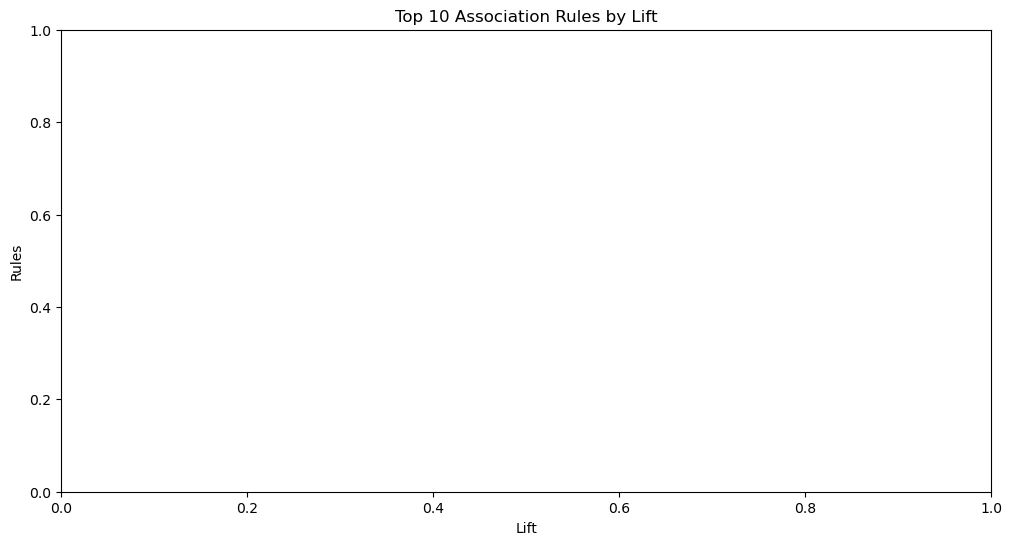

In [9]:
top_rules = rules.nlargest(10, 'lift')

plt.figure(figsize=(12, 6))
sns.barplot(x='lift', y='antecedents', data=top_rules)
plt.title('Top 10 Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Rules')
plt.show()

In [10]:
print(rules.dtypes)

antecedents           object
consequents           object
antecedent support    object
consequent support    object
support               object
confidence            object
lift                   int64
leverage              object
conviction            object
zhangs_metric         object
dtype: object


## Create a Network Graph of Association Rules
Using NetworkX, you can create a network graph to visualize how items are associated with one another.

In [11]:
print(rules.shape)  # Output will be (number of rows, number of columns)

(0, 10)


In [12]:
# Example of accessing a row safely
if len(rules) > 0:
    print(rules.iloc[0])  # Access the first row only if rules is not empty
else:
    print("DataFrame is empty.")

DataFrame is empty.


In [13]:
filtered_rules = rules[rules['lift'] > 1]  # Example filter
if not filtered_rules.empty:
    print(filtered_rules.iloc[0])  # Access first row of filtered results
else:
    print("No rules found after filtering.")

No rules found after filtering.


In [14]:
try:
    # Your code that raises IndexError
    top_rules = rules.nlargest(10, 'lift')
except IndexError as e:
    print(f"IndexError: {e}")
    print(f"Available indices: {rules.index.tolist()}")

In [15]:
def draw_graph(rules, rules_to_show):
    G1 = nx.DiGraph()
    for i in range(rules_to_show):
        antecedents = list(rules.iloc[i]['antecedents'])
        consequent = list(rules.iloc[i]['consequents'])[0]
        for antecedent in antecedents:
            G1.add_edge(antecedent, consequent)

    pos = nx.spring_layout(G1)
    plt.figure(figsize=(12, 12))
    nx.draw(G1, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', arrows=True)
    plt.title('Network Graph of Association Rules')
    plt.show()

draw_graph(rules, 10)  # Adjust the number of rules to display as needed

c:\Users\User\.conda\envs\mba\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
c:\Users\User\.conda\envs\mba\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
c:\Users\User\.conda\envs\mba\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)
c:\Users\User\.conda\envs\mba\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
c:\Users\User\.conda\envs\mba\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)
c:\Users\User\

IndexError: single positional indexer is out-of-bounds